In [1]:
%matplotlib inline
import sys
sys.path.append("..")

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.tablogger import TabLogger

In [3]:
# load the file from the experiments directories

df = pd.DataFrame({})
for run in range(10):    
    fpath = os.path.join(
        "..",
        "experiments",
        "cifar100-vgg19_bn-packed-run{}".format(run),
        "out",
        "epoch.out"
    )
    tlog = TabLogger(fpath, resume=True)
    tlog.close()

    # add the run column to the data dictionary
    dd = tlog.numbers
    dd["Run"] = ["Run{}".format(run)] * len(list(dd.values())[0])

    # concat the dataframe
    df = pd.concat([df, pd.DataFrame(dd)])

In [4]:
print(df)

     Epoch  Train Task Loss  Train Acc  Eval Task Loss  Eval Acc     LR   Run
0      0.0         4.263749      4.198        3.930479      8.61  0.100  Run0
1      1.0         3.750373     10.232        3.625124     12.09  0.100  Run0
2      2.0         3.449349     15.052        3.590231     12.69  0.100  Run0
3      3.0         3.104568     20.976        3.295409     18.33  0.100  Run0
4      4.0         2.809833     26.452        2.771602     27.11  0.100  Run0
..     ...              ...        ...             ...       ...    ...   ...
159  159.0         0.056646     98.486        1.628438     68.76  0.001  Run9
160  160.0         0.052637     98.672        1.629369     68.93  0.001  Run9
161  161.0         0.053858     98.602        1.641113     68.72  0.001  Run9
162  162.0         0.052653     98.602        1.641154     68.73  0.001  Run9
163  163.0         0.050733     98.670        1.645724     68.58  0.001  Run9

[1640 rows x 7 columns]


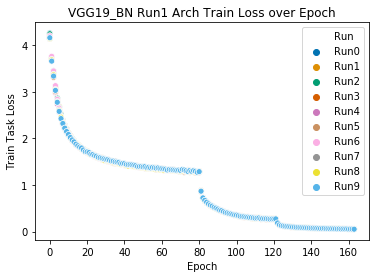

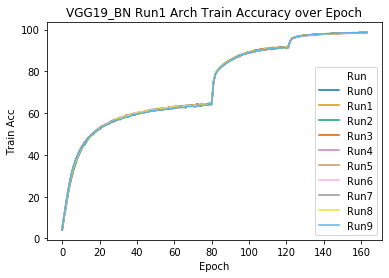

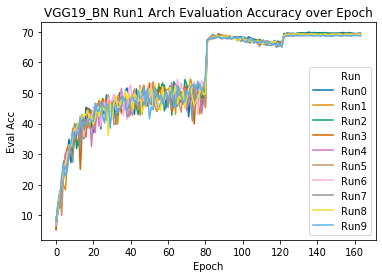

In [6]:
# plot in Seaborn
# plt.figure(figsize=(15, 6))


tl = sns.scatterplot(
    x="Epoch", y="Train Task Loss", hue="Run", data=df, palette="colorblind"
)
tl.set(title="VGG19_BN Run1 Arch Train Loss over Epoch")

plt.savefig("train_loss-cifar100-vgg19_bn-packed.png", dpi=200)
plt.show()
ta = sns.lineplot(
    x="Epoch", y="Train Acc", hue="Run", data=df, palette="colorblind"
)
ta.set(title="VGG19_BN Run1 Arch Train Accuracy over Epoch")

plt.savefig("train_acc-cifar100-vgg19_bn-packed.png", dpi=200)
plt.show()
ea = sns.lineplot(
    x="Epoch", y="Eval Acc", hue="Run", data=df, palette="colorblind"
)
ea.set(title="VGG19_BN Run1 Arch Evaluation Accuracy over Epoch")

# g.set_yscale("log")
plt.savefig("eval_acc-cifar100-vgg19_bn-packed.png", dpi=200)
plt.show()